Time delay estimate is 161. Truth is 160


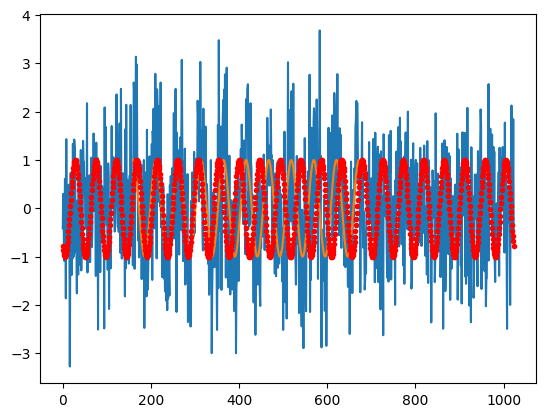

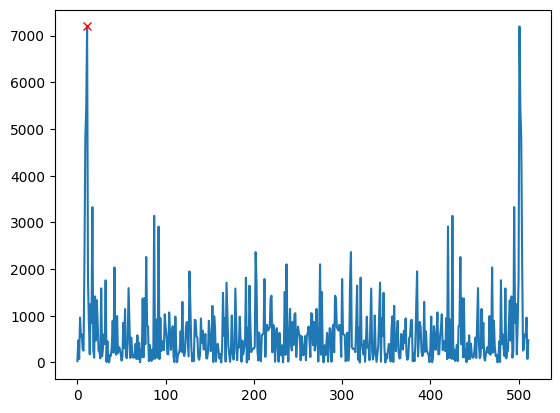

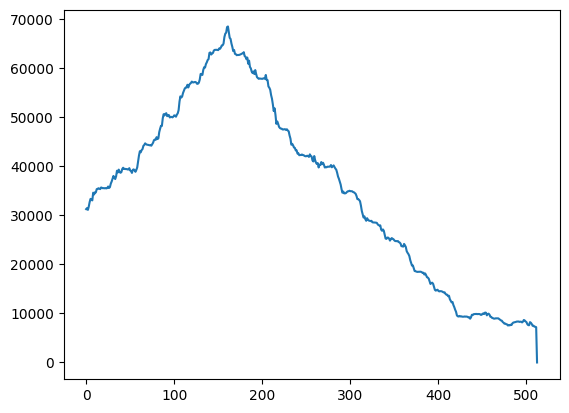

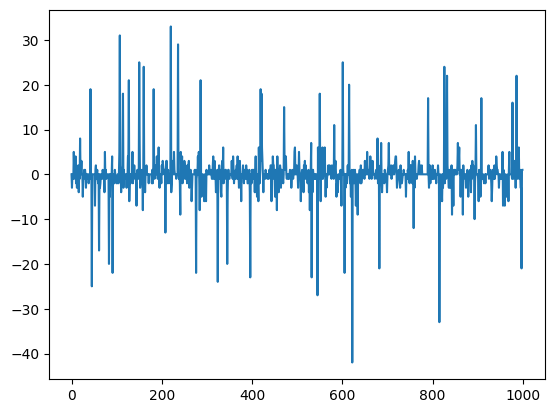

In [1]:
import numpy as np
from matplotlib import pyplot as plt


N = 1024
M = 512

def find_a_phi(x, n00, MM):

    seg_x = x[n00:(n00+M)]
    
    periodogram = np.square(np.abs(np.fft.fft(seg_x)))
    omega_hat_index = np.argmax(periodogram[0:int(M/2)])
    omega_hat = 2*np.pi*omega_hat_index/MM

    alpha1_hat = 2/M*np.sum(seg_x*np.cos(omega_hat*np.linspace(0,10,MM)))
    alpha2_hat = 2/M*np.sum(seg_x*np.sin(omega_hat*np.linspace(0,10,MM)))

    Ahat = np.sqrt(np.square(alpha1_hat) + np.square(alpha2_hat))
    phihat = np.arctan2(-alpha2_hat, alpha1_hat)

    return Ahat, phihat, omega_hat, periodogram, omega_hat_index

Nruns = 1000

error = np.zeros(Nruns)

for run in range(Nruns):

    n0 = int(200*np.random.rand() + 100)

    x = np.random.normal(size=N)
    sinewave = np.cos(2*np.pi*np.linspace(0,10,M))
    x[n0:(n0+M)] = x[n0:(n0+M)] + sinewave

    peak = np.zeros(N-M+1)

    for n000 in range(N-M):
        idx = int(n000)
        Ahat, phihat, omega_hat, periodogram, omega_hat_index = find_a_phi(x, idx, M)
        peak[idx] = periodogram[omega_hat_index]
        
        
    error[run] = np.argmax(peak)-n0

plt.figure(1)
plt.plot(x)
plt.plot(np.linspace(n0,n0+M,M), sinewave)
plt.plot(np.cos(omega_hat*np.linspace(0,N,N) - phihat + n0),'r.')

plt.figure(2)
plt.plot(periodogram)
plt.plot(omega_hat_index,periodogram[omega_hat_index],'rx')

plt.figure(3)
plt.plot(peak)

print("Time delay estimate is " + str(np.argmax(peak)) + ". Truth is " + str(n0))

plt.figure(4)
plt.plot(error)




In [2]:
np.mean(np.abs(error))

2.17

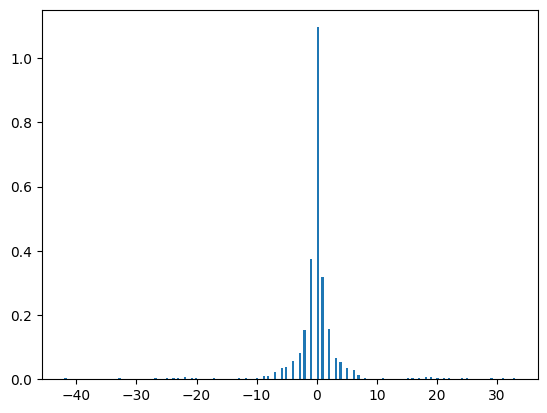

In [6]:
a,b,c = plt.hist(error, bins=200, density=True)